# Task 1 (Binary Classification)

### Average Sentence Length extraction

In [1]:
import re
from nltk.tokenize import sent_tokenize
from PyPDF2 import PdfReader

def extract_sentences_from_pdf(pdf_path):
    # Load the PDF
    reader = PdfReader(pdf_path)
    full_text = ""

    # Extract text from each page
    for page in reader.pages:
        full_text += page.extract_text() + " "

    # Basic cleaning to remove headings, equations, and unnecessary content
    cleaned_text = re.sub(r"(\n|\\n)+", " ", full_text)  # Remove newlines
    cleaned_text = re.sub(r"[^\w\s.,!?-]", "", cleaned_text)  # Remove special characters
    cleaned_text = re.sub(r"\b[A-Z]{2,}\b", "", cleaned_text)  # Remove headings (all-uppercase words)

    # Tokenize into sentences
    sentences = sent_tokenize(cleaned_text)

    # Filter out equations (e.g., containing "=" or numbers with operators)
    sentences = [
        sentence.strip()
        for sentence in sentences
        if not re.search(r"[=+\-*/^]", sentence) and len(re.findall(r"\d", sentence)) < len(sentence.split()) // 2
    ]

    return sentences

In [3]:
def get_sent_len_list(sent):
    return [len(i) for i in sent]

In [ ]:
import os
non_pub_path = "Data/Papers"
sent_list_uc = []
coherence_list_uc = []
sent_len_list_uc = []
for file_name in os.listdir(non_pub_path):
    file_path = os.path.join(non_pub_path, file_name)
    
    # Check if the file is a PDF
    print(f'Processing: {file_name}')

    if file_name.endswith(".pdf"):

        sent = extract_sentences_from_pdf(file_path)
        sent_len = get_sent_len_list(sent)
        sent_list_uc.append(sent)
        sent_len_list_uc.append(sent_len)

Processing: P001.pdf
Processing: P002.pdf
Processing: P003.pdf
Processing: P004.pdf
Processing: P005.pdf
Processing: P006.pdf
Processing: P007.pdf
Processing: P008.pdf
Processing: P009.pdf
Processing: P010.pdf
Processing: P011.pdf
Processing: P012.pdf
Processing: P013.pdf
Processing: P014.pdf
Processing: P015.pdf
Processing: P016.pdf
Processing: P017.pdf
Processing: P018.pdf
Processing: P019.pdf
Processing: P020.pdf
Processing: P021.pdf
Processing: P022.pdf
Processing: P023.pdf
Processing: P024.pdf
Processing: P025.pdf
Processing: P026.pdf
Processing: P027.pdf
Processing: P028.pdf
Processing: P029.pdf
Processing: P030.pdf
Processing: P031.pdf
Processing: P032.pdf
Processing: P033.pdf
Processing: P034.pdf
Processing: P035.pdf
Processing: P036.pdf
Processing: P037.pdf
Processing: P038.pdf
Processing: P039.pdf
Processing: P040.pdf
Processing: P041.pdf
Processing: P042.pdf
Processing: P043.pdf
Processing: P044.pdf
Processing: P045.pdf
Processing: P046.pdf
Processing: P047.pdf
Processing: P

In [6]:
import statistics
avg_len_uc = [statistics.mean(i) for i in sent_len_list_uc]

Text(0.5, 0, 'average length')

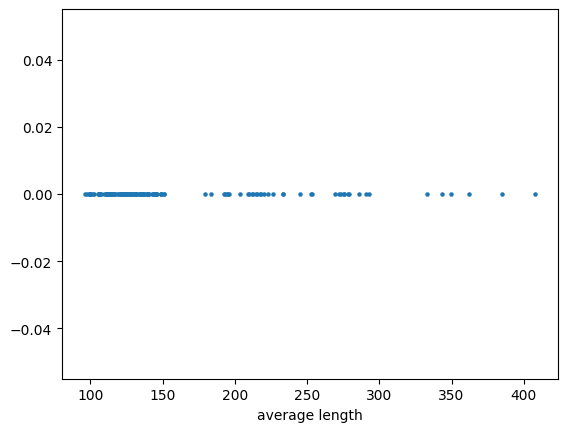

In [8]:
import matplotlib.pyplot as plt
plt.scatter(avg_len_uc,[0]*len(avg_len_uc), s=5)
plt.xlabel('average length')

### Density estimation for numerical and mathematical characters

In [ ]:
import re
from PyPDF2 import PdfReader

def analyze_pdf_characters(pdf_path):
    try:
        # Open and read the PDF
        reader = PdfReader(pdf_path)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
        
        # Define patterns
        numerical_pattern = r'[0-9]'
        math_pattern = r'[+\-*/=^%()]'
        math_pattern = r'[σ∑∫π√∞Δθλ+\-=*/^<>%∂µˆΓαγδθλϵ(){}]'
        
        # Calculate character counts
        total_characters = len(text)  # Total characters, including spaces and newlines
        numerical_count = len(re.findall(numerical_pattern, text))  # Count numerical characters
        math_count = len(re.findall(math_pattern, text))  # Count mathematical characters
        
        return total_characters, numerical_count, math_count
    except Exception as e:
        print(f"Error processing PDF: {e}")
        return None, None, None


# Example usage
pdf_path = r"Data\Reference\Publishable\TMLR\R015.pdf"  # Replace with the path to your PDF file
total_characters, numerical_count, math_count = analyze_pdf_characters(pdf_path)

if total_characters is not None:
    print(f"Total number of characters in the PDF: {total_characters}")
    print(f"Number of numerical characters: {numerical_count}")
    print(f"Number of mathematical characters: {math_count}")
    print(f"Ratio : {((numerical_count+math_count)/total_characters)*10}")

Total number of characters in the PDF: 20341
Number of numerical characters: 438
Number of mathematical characters: 1020
Ratio : 0.7167789194238238


In [ ]:
import os
non_pub_path = "Data/Papers"
unlabeled_densities1 = []
for file_name in os.listdir(non_pub_path):
    file_path = os.path.join(non_pub_path, file_name)
    
    # Check if the file is a PDF
    

    if file_name.endswith(".pdf"):

        print(f'processing {file_name}')

        total_characters, numerical_count, math_count = analyze_pdf_characters(file_path)
        densities = (numerical_count+math_count)/total_characters

        unlabeled_densities1.append(densities)

processing P001.pdf
processing P002.pdf
processing P003.pdf
processing P004.pdf
processing P005.pdf
processing P006.pdf
processing P007.pdf
processing P008.pdf
processing P009.pdf
processing P010.pdf
processing P011.pdf
processing P012.pdf
processing P013.pdf
processing P014.pdf
processing P015.pdf
processing P016.pdf
processing P017.pdf
processing P018.pdf
processing P019.pdf
processing P020.pdf
processing P021.pdf
processing P022.pdf
processing P023.pdf
processing P024.pdf
processing P025.pdf
processing P026.pdf
processing P027.pdf
processing P028.pdf
processing P029.pdf
processing P030.pdf
processing P031.pdf
processing P032.pdf
processing P033.pdf
processing P034.pdf
processing P035.pdf
processing P036.pdf
processing P037.pdf
processing P038.pdf
processing P039.pdf
processing P040.pdf
processing P041.pdf
processing P042.pdf
processing P043.pdf
processing P044.pdf
processing P045.pdf
processing P046.pdf
processing P047.pdf
processing P048.pdf
processing P049.pdf
processing P050.pdf


### Coherence

In [11]:
from transformers import BertTokenizer
from transformers import BertModel

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

e:\Projects\ProjectEnvironment\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
from sklearn.metrics.pairwise import cosine_similarity

def get_coherence(s, tokenizer, model):
    sentence1 = s
    
    tokens1 = tokenizer(sentence1, return_tensors="pt", padding=True, truncation=True)

    outputs1 = model(**tokens1)

    # cls_embedding1 = outputs1.last_hidden_state[:, 0, :]  # Shape: (1, hidden_size)

    # Extract token embeddings (excluding [CLS] and [SEP])
    token_embeddings1 = outputs1.last_hidden_state.squeeze(0)[1:-1]

    # Compute pairwise cosine similarity for tokens
    similarity_matrix1 = cosine_similarity(token_embeddings1.detach().numpy())

    coherence_score1 = similarity_matrix1.mean()

    return coherence_score1

In [13]:
def get_coherence_list(sent):    
    path1_coherence = []
    for i in sent:
        path1_coherence.append(get_coherence(i, tokenizer, model))
    return path1_coherence

In [ ]:
root_folder = "Data/Papers"
coherence_list1 = []
coherence_avg_list1 = []
for file_name in os.listdir(root_folder):
    file_path = os.path.join(root_folder, file_name)
    
    # Check if the file is a PDF
    

    if file_name.endswith(".pdf"):
        # Replace with your processing logic
        print(f"file_name: {file_name}")
        sent = extract_sentences_from_pdf(file_path)
        coherence = get_coherence_list(sent)
        coherence_list1.append(coherence)
        coherence_avg_list1.append(statistics.mean(coherence))

file_name: P001.pdf
file_name: P002.pdf
file_name: P003.pdf
file_name: P004.pdf
file_name: P005.pdf
file_name: P006.pdf
file_name: P007.pdf
file_name: P008.pdf
file_name: P009.pdf
file_name: P010.pdf
file_name: P011.pdf
file_name: P012.pdf
file_name: P013.pdf
file_name: P014.pdf
file_name: P015.pdf
file_name: P016.pdf
file_name: P017.pdf
file_name: P018.pdf
file_name: P019.pdf
file_name: P020.pdf
file_name: P021.pdf
file_name: P022.pdf
file_name: P023.pdf
file_name: P024.pdf
file_name: P025.pdf
file_name: P026.pdf
file_name: P027.pdf
file_name: P028.pdf
file_name: P029.pdf
file_name: P030.pdf
file_name: P031.pdf
file_name: P032.pdf
file_name: P033.pdf
file_name: P034.pdf
file_name: P035.pdf
file_name: P036.pdf
file_name: P037.pdf
file_name: P038.pdf
file_name: P039.pdf
file_name: P040.pdf
file_name: P041.pdf
file_name: P042.pdf
file_name: P043.pdf
file_name: P044.pdf
file_name: P045.pdf
file_name: P046.pdf
file_name: P047.pdf
file_name: P048.pdf
file_name: P049.pdf
file_name: P050.pdf


## Master Code

In [10]:
from transformers import BertTokenizer
from transformers import BertModel

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

e:\Projects\ProjectEnvironment\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
from sklearn.metrics.pairwise import cosine_similarity
import statistics

def get_coherence(s, tokenizer, model):
    sentence1 = s
    
    tokens1 = tokenizer(sentence1, return_tensors="pt", padding=True, truncation=True)

    outputs1 = model(**tokens1)

    # cls_embedding1 = outputs1.last_hidden_state[:, 0, :]  # Shape: (1, hidden_size)

    # Extract token embeddings (excluding [CLS] and [SEP])
    token_embeddings1 = outputs1.last_hidden_state.squeeze(0)[1:-1]

    # Compute pairwise cosine similarity for tokens
    similarity_matrix1 = cosine_similarity(token_embeddings1.detach().numpy())

    coherence_score1 = similarity_matrix1.mean()

    return coherence_score1

def get_sent_len_list(sent):
    return [len(i) for i in sent]


def get_coherence_list(sent):    
    path1_coherence = []
    for i in sent:
        path1_coherence.append(get_coherence(i, tokenizer, model))
    return path1_coherence

In [8]:
import re
from nltk.tokenize import sent_tokenize
from PyPDF2 import PdfReader

def extract_all_from_pdf(pdf_path):
    # Load the PDF
    reader = PdfReader(pdf_path)
    full_text = ""

    # Extract text from each page
    for page in reader.pages:
        full_text += page.extract_text() + " "

    # Define patterns
    numerical_pattern = r'[0-9]'
    math_pattern = r'[+\-*/=^%()]'
    math_pattern = r'[σ∑∫π√∞Δθλ+\-=*/^<>%∂µˆΓαγδθλϵ(){}]'
    
    # Calculate character counts
    total_characters = len(full_text)  # Total characters, including spaces and newlines
    numerical_count = len(re.findall(numerical_pattern, full_text))  # Count numerical characters
    math_count = len(re.findall(math_pattern, full_text))  # Count mathematical characters

    # Basic cleaning to remove headings, equations, and unnecessary content
    cleaned_text = re.sub(r"(\n|\\n)+", " ", full_text)  # Remove newlines
    cleaned_text = re.sub(r"[^\w\s.,!?-]", "", cleaned_text)  # Remove special characters
    cleaned_text = re.sub(r"\b[A-Z]{2,}\b", "", cleaned_text)  # Remove headings (all-uppercase words)

    # Tokenize into sentences
    sentences = sent_tokenize(cleaned_text)

    # Filter out equations (e.g., containing "=" or numbers with operators)
    sentences = [
        sentence.strip()
        for sentence in sentences
        if not re.search(r"[=+\-*/^]", sentence) and len(re.findall(r"\d", sentence)) < len(sentence.split()) // 2
    ]

    return sentences, total_characters, numerical_count, math_count

In [ ]:
import os
root_folder = "Data/Papers"
sent_avg_len_list = []
coherence_avg_list = []
ratio_list = []
for file_name in os.listdir(root_folder):
    file_path = os.path.join(root_folder, file_name)
    
    # Check if the file is a PDF
    

    if file_name.endswith(".pdf"):
        # Replace with your processing logic
        print(f"file_name: {file_name}")
        sent, tot_char, num_count, math_count = extract_sentences_from_pdf(file_path)
        coherence = get_coherence_list(sent)
        sent_len = get_sent_len_list(sent)
        sent_avg_len_list.append(statistics.mean(sent_len))
        coherence_avg_list.append(statistics.mean(coherence))
        ratio_list.append((num_count+math_count)/tot_char)

file_name: P001.pdf
file_name: P002.pdf
file_name: P003.pdf
file_name: P004.pdf
file_name: P005.pdf
file_name: P006.pdf
file_name: P007.pdf
file_name: P008.pdf
file_name: P009.pdf
file_name: P010.pdf
file_name: P011.pdf
file_name: P012.pdf
file_name: P013.pdf
file_name: P014.pdf
file_name: P015.pdf
file_name: P016.pdf
file_name: P017.pdf
file_name: P018.pdf
file_name: P019.pdf
file_name: P020.pdf
file_name: P021.pdf
file_name: P022.pdf
file_name: P023.pdf
file_name: P024.pdf
file_name: P025.pdf
file_name: P026.pdf
file_name: P027.pdf
file_name: P028.pdf
file_name: P029.pdf
file_name: P030.pdf
file_name: P031.pdf
file_name: P032.pdf
file_name: P033.pdf
file_name: P034.pdf
file_name: P035.pdf
file_name: P036.pdf
file_name: P037.pdf
file_name: P038.pdf
file_name: P039.pdf
file_name: P040.pdf
file_name: P041.pdf
file_name: P042.pdf
file_name: P043.pdf
file_name: P044.pdf
file_name: P045.pdf
file_name: P046.pdf
file_name: P047.pdf
file_name: P048.pdf
file_name: P049.pdf
file_name: P050.pdf


In [14]:
import numpy as np
densities_list = np.array(ratio_list)

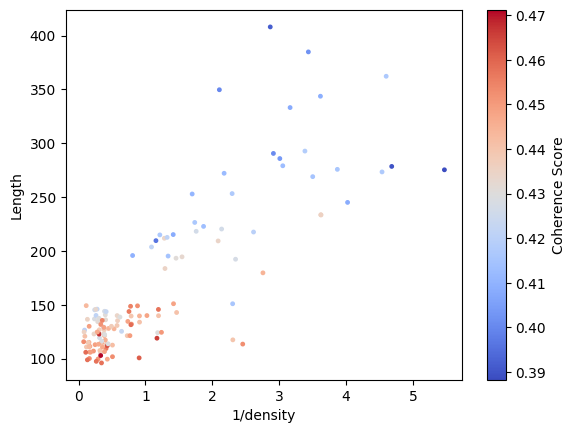

In [16]:
import matplotlib.pyplot as plt
x, y = 1/(densities_list*100), sent_avg_len_list
z = coherence_avg_list
scatter = plt.scatter(x, y, c=z, cmap='coolwarm', s=6)

# Add a colorbar to show the mapping
plt.colorbar(scatter, label='Coherence Score')

# Label axes
plt.xlabel('1/density')
plt.ylabel('Length')

# Show the plot
plt.show()

Here we can see a clear boundary for publishable papers. It looks like papers in the range -> average sentence length between 0 to 150 and 1/density between 0 to 1.8 are all publishable. Coherence threshold is set above 0.40 to eliminate any random vague papers if there are any.

### Single pdf classsifier (Final)

In [17]:
from transformers import BertTokenizer
from transformers import BertModel

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
import statistics

def get_coherence(s, tokenizer, model):
    sentence1 = s
    
    tokens1 = tokenizer(sentence1, return_tensors="pt", padding=True, truncation=True)

    outputs1 = model(**tokens1)

    # cls_embedding1 = outputs1.last_hidden_state[:, 0, :]  # Shape: (1, hidden_size)

    # Extract token embeddings (excluding [CLS] and [SEP])
    token_embeddings1 = outputs1.last_hidden_state.squeeze(0)[1:-1]

    # Compute pairwise cosine similarity for tokens
    similarity_matrix1 = cosine_similarity(token_embeddings1.detach().numpy())

    coherence_score1 = similarity_matrix1.mean()

    return coherence_score1

def get_coherence_list(sent):    
    path1_coherence = []
    for i in sent:
        path1_coherence.append(get_coherence(i, tokenizer, model))
    return path1_coherence

def get_sent_len_list(sent):
    return [len(i) for i in sent]

In [30]:
import re
from nltk.tokenize import sent_tokenize
from PyPDF2 import PdfReader

def extract_all_from_pdf(pdf_path, include_coherence=True):
    # Load the PDF
    reader = PdfReader(pdf_path)
    full_text = ""

    # Extract text from each page
    for page in reader.pages:
        full_text += page.extract_text() + " "

    # Define patterns
    numerical_pattern = r'[0-9]'
    math_pattern = r'[+\-*/=^%()]'
    math_pattern = r'[σ∑∫π√∞Δθλ+\-=*/^<>%∂µˆΓαγδθλϵ(){}]'
    
    # Calculate character counts
    total_characters = len(full_text)  # Total characters, including spaces and newlines
    numerical_count = len(re.findall(numerical_pattern, full_text))  # Count numerical characters
    math_count = len(re.findall(math_pattern, full_text))  # Count mathematical characters

    # Basic cleaning to remove headings, equations, and unnecessary content
    cleaned_text = re.sub(r"(\n|\\n)+", " ", full_text)  # Remove newlines
    cleaned_text = re.sub(r"[^\w\s.,!?-]", "", cleaned_text)  # Remove special characters
    cleaned_text = re.sub(r"\b[A-Z]{2,}\b", "", cleaned_text)  # Remove headings (all-uppercase words)

    # Tokenize into sentences
    sentences = sent_tokenize(cleaned_text)

    # Filter out equations (e.g., containing "=" or numbers with operators)
    sentences = [
        sentence.strip()
        for sentence in sentences
        if not re.search(r"[=+\-*/^]", sentence) and len(re.findall(r"\d", sentence)) < len(sentence.split()) // 2
    ]

    if include_coherence:
        coherence = statistics.mean(get_coherence_list(sentences))

    sent_len = statistics.mean(get_sent_len_list(sentences))

    if include_coherence:
        return sent_len, (math_count+numerical_count)/total_characters, coherence
    else:
        return sent_len, (math_count+numerical_count)/total_characters

In [37]:
def classify_pdf(pdf_path, length_range=[0,160], density_range=[0,1.8], coherence_range=[0.40, 1], include_coherence=True):
    if include_coherence:
        sentence_length, density, coherence = extract_all_from_pdf(pdf_path, include_coherence=include_coherence)
        if (length_range[0]<=sentence_length<=length_range[1]) and (density_range[0]<=density<=density_range[1]) and (coherence_range[0]<=coherence<=coherence_range[1]):
            return True
        return False 
    else:
        sentence_length, density = extract_all_from_pdf(pdf_path, include_coherence=False)
        if (length_range[0]<=sentence_length<=length_range[1]) and (density_range[0]<=density<=density_range[1]):
            return True
        return False 

In [ ]:
pdf_path = r"Data\Reference\Non-Publishable\R004.pdf"
classify_pdf(pdf_path, include_coherence=False)

False